In [1]:
import numpy as np
import os

# set where the bpod file is, mouse id and session
bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
mouse = "BCI_69"
session = "022924"

# load data
bpod_filepath = os.path.join(bpod_path, mouse, session+"-bpod_zaber.npy")
bpod_data = np.load(bpod_filepath, allow_pickle=True).tolist()

In [2]:
# align behavior data by scanimage basenames
scanimage_file_names = list()
basenames = list()
file_indices = list()
trial_indices = list()
for trial_i,sfn in enumerate(bpod_data['scanimage_file_names']):
    if type(sfn) == type('no movie for this trial'):
        continue
    else:
        for file in sfn:
            if '_' in file:# and ('cell' in file.lower() or 'stim' in file.lower()):
                basenames.append(file[:-1*file[::-1].find('_')-1])
                try:
                    file_indices.append(int(file[-1*file[::-1].find('_'):file.find('.')]))
                except:
                    print('weird file index: {}'.format(file))
                    file_indices.append(-1)
            else:
                basenames.append(file[:file.find('.')])
                file_indices.append(-1)
            trial_indices.append(trial_i)
            scanimage_file_names.append(file)

            
scanimage_file_names = np.asarray(scanimage_file_names)
basenames =np.asarray(basenames)
file_indices =np.asarray(file_indices)
trial_indices = np.asarray(trial_indices)

unique_basenames = np.unique(basenames)
basenames_order = []
for basename in unique_basenames:
    basenames_order.append(np.argmax(np.asarray(basenames)==basename))
unique_basenames = unique_basenames[np.argsort(basenames_order)]

Text(0, 0.5, 'Hit rate')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


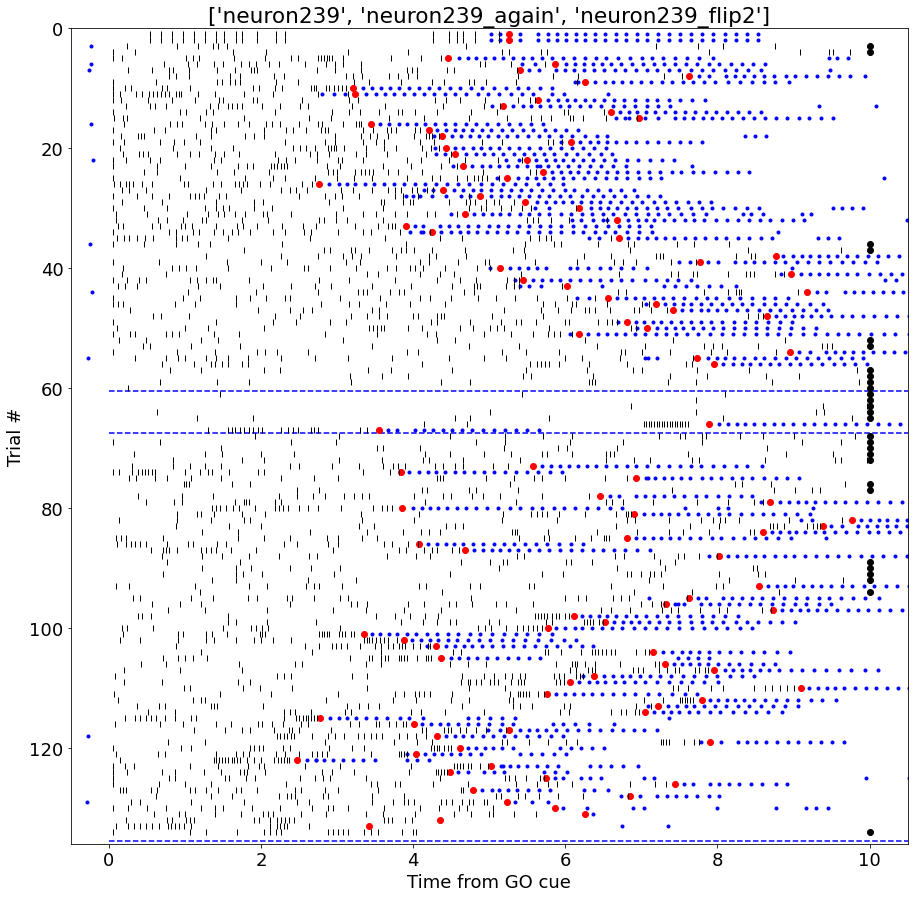

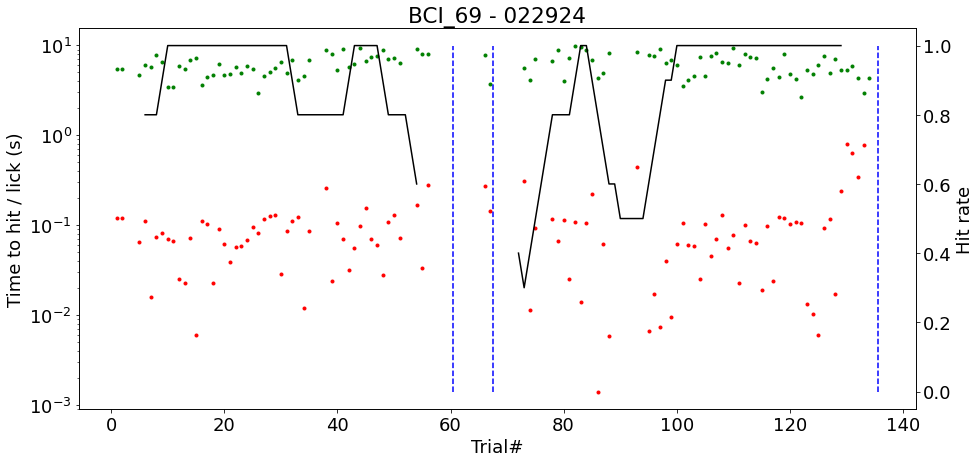

In [3]:
#plot

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize = [15,15])
ax = fig.add_subplot(1,1,1)
fig2 = plt.figure(figsize = [15,7])
ax_time_to_hit = fig2.add_subplot(1,1,1)
ax_hit = ax_time_to_hit.twinx()
trials_so_far = 1
basenames_plotted = []
time_to_threshold_crossing = []
time_to_lick = []
for basename in unique_basenames:
    trials_now = basename==basenames
    trial_indices_now = trial_indices[trials_now]
    hits = []
    trial_indices_to_plot = []
    time_to_threshold_crossing = []
    time_to_lick = []
    for trial_i,trial_idx in enumerate(trial_indices_now):
        go_cue_time = bpod_data['go_cue_times'][trial_idx][0]
        scanimage_trigger_time =bpod_data['Scanimage_trigger_times'][trial_idx][0]
        lick_times =bpod_data['lick_L'][trial_idx]
        reward_times =bpod_data['reward_L'][trial_idx]
        lickport_step_times =bpod_data['zaber_move_forward'][trial_idx]
        threshold_crossing_time = bpod_data['threshold_crossing_times'][trial_idx]
        if len(threshold_crossing_time)>0:
            lickport_step_times = lickport_step_times[lickport_step_times<=threshold_crossing_time[0]]
            time_to_threshold_crossing.append(threshold_crossing_time[0])
        else:
            time_to_threshold_crossing.append(np.nan)
        
        zero_time = go_cue_time
        
        ax.plot(lick_times-zero_time,np.ones(len(lick_times))*(trial_i+trials_so_far),'b.')
        if len(reward_times)>0:
            ax.plot(reward_times[0]-zero_time,trial_i+trials_so_far,'ro')
            hits.append(1)
            time_to_lick.append(reward_times[0]-threshold_crossing_time[0])
        else:
            ax.plot(10,trial_i+trials_so_far,'ko')
            hits.append(0)
            time_to_lick.append(np.nan)
        trial_indices_to_plot.append(trial_i+trials_so_far)
        ax.plot(lickport_step_times-zero_time,np.ones(len(lickport_step_times))*(trial_i+trials_so_far),'k|')
    trials_so_far += trial_i + 1
    basenames_plotted.append(basename)
    
    ax.hlines(trials_so_far+.5,0,20,color= 'blue',linestyles = 'dashed')
    
    hit_rate = np.convolve(hits,np.ones(10)/10,mode = 'same')
    hit_rate[:5] = np.nan
    hit_rate[-5:] = np.nan
    if len(trial_indices_to_plot)>10:
        ax_hit.plot(trial_indices_to_plot,hit_rate,'k-')
    ax_hit.vlines(trials_so_far+.5,0,1,color= 'blue',linestyles = 'dashed')
    ax_time_to_hit.plot(trial_indices_to_plot,time_to_threshold_crossing,'g.')
    ax_time_to_hit.plot(trial_indices_to_plot,time_to_lick,'r.')
ax_time_to_hit.set_yscale('log')
    
ax_time_to_hit.set_ylabel('')
ax.set_ylim([trials_so_far+1,0])
ax.set_xlim([-.5, 10.5])
ax.set_xlabel('Time from GO cue')
ax.set_ylabel('Trial #')
ax.set_title(basenames_plotted)

ax_time_to_hit.set_ylabel('Time to hit / lick (s)')
ax_time_to_hit.set_xlabel('Trial#')
ax_time_to_hit.set_title('{} - {}'.format(mouse,session))
ax_hit.set_ylabel('Hit rate')

In [4]:
motion_energy_folder = '/home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI_imaging_aligned/'

# mouse = "BCI_69"
# session = "030324"

# load data
motion_energy_filepath = os.path.join(motion_energy_folder, "{}_{}_side_motion_energy.npy".format(mouse,session))
motion_energy_data = np.load(motion_energy_filepath, allow_pickle=True).tolist()

In [5]:
scanimage_file_names = list()
basenames = list()
file_indices = list()
trial_indices = list()
for trial_i,motion_data_now in enumerate(motion_energy_data):
    sfn = motion_data_now['scanimage_file_name']
    if type(sfn) == type(''):
        continue
    for file in sfn:
        if '_' in file:# and ('cell' in file.lower() or 'stim' in file.lower()):
            basenames.append(file[:-1*file[::-1].find('_')-1])
            try:
                file_indices.append(int(file[-1*file[::-1].find('_'):file.find('.')]))
            except:
                print('weird file index: {}'.format(file))
                file_indices.append(-1)
        else:
            basenames.append(file[:file.find('.')])
            file_indices.append(-1)
        trial_indices.append(trial_i)
        scanimage_file_names.append(file)

            
scanimage_file_names = np.asarray(scanimage_file_names)
basenames =np.asarray(basenames)
file_indices =np.asarray(file_indices)
trial_indices = np.asarray(trial_indices)

unique_basenames = np.unique(basenames)
basenames_order = []
for basename in unique_basenames:
    basenames_order.append(np.argmax(np.asarray(basenames)==basename))
unique_basenames = unique_basenames[np.argsort(basenames_order)]

In [6]:
unique_basenames

array(['neuron239', 'neuron239_again', 'neuron239_flip2'], dtype='<U15')

In [7]:
time_end = 10
si = np.median(np.diff(motion_energy_data[0]['frame_times']))
trace_length = int(time_end/si)
time_trace = np.arange(trace_length)*si
motion_energy_matrix_dict = {}
for k in motion_energy_data[0]['motion_energy_traces'].keys():
    motion_energy_matrix_dict[k] = []
    
for basename in unique_basenames:
    trials_now = basename==basenames
    trial_indices_now = trial_indices[trials_now]
    for trial_i,trial_idx in enumerate(trial_indices_now):
        for k in motion_energy_data[trial_idx]['motion_energy_traces'].keys():
            trace_raw = motion_energy_data[trial_idx]['motion_energy_traces'][k]
            trace_now = np.nan*time_trace
            trace_now[:np.min([len(trace_raw),len(trace_now)])]=trace_raw[:np.min([len(trace_raw),len(trace_now)])]
            motion_energy_matrix_dict[k].append(trace_now)
        
for k in motion_energy_data[0]['motion_energy_traces'].keys():
    motion_energy_matrix_dict[k] = np.asarray(motion_energy_matrix_dict[k])


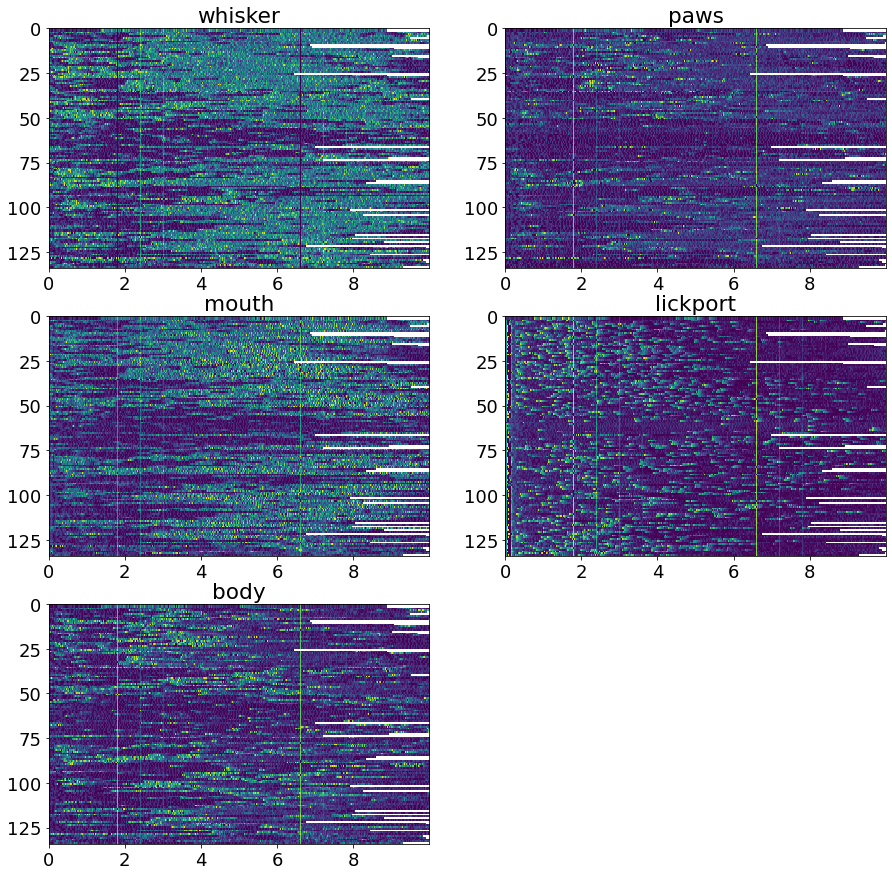

In [8]:
fig = plt.figure(figsize = [15,15])
for i,k in enumerate(motion_energy_data[0]['motion_energy_traces'].keys()):
    ax = fig.add_subplot(3,2,i+1)
    
    d = motion_energy_matrix_dict[k].flatten()
    d=d[np.isnan(d)==False]
    
    matrix_now = motion_energy_matrix_dict[k]
    matrix_now[matrix_now>np.percentile(d,99)]=0
    im = ax.imshow(matrix_now,aspect = 'auto',interpolation = 'none',extent = [time_trace[0],time_trace[-1],motion_energy_matrix_dict[k].shape[0],0])
    im.set_clim(np.percentile(d,[5,99]))
    ax.set_title(k)